In [1]:
import numpy as np
import pandas as pd

In [2]:
test_data= pd.read_csv("/home/fhz/Desktop/my/Web visual/BUG DATA/MozillaCore/test.csv")

In [3]:
test_have_duplicate = test_data[["Duplicate","Issue_id"]][test_data["Duplicate"].isnull() == False]

In [4]:
test_have_duplicate.shape

(4115, 2)

In [5]:
test_data.shape

(41014, 2)

In [6]:
test_have_duplicate = test_have_duplicate.reset_index(drop=True)

In [7]:
long_duplicate = []
for i in range(test_have_duplicate.shape[0]):
    k = len(test_have_duplicate["Duplicate"][i].split(";"))
    if k != 1:
        long_duplicate.append([k,i])

In [8]:
import matplotlib.pyplot as plt

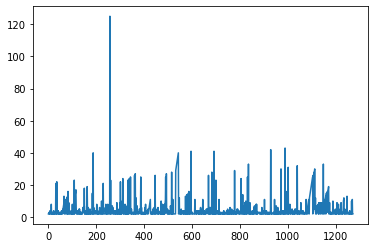

In [9]:
plt.plot([i[0] for i in long_duplicate])

In [10]:
Dis = [0,0,0,0,0]
Dis_data = [[],[],[],[],[]]
for i in long_duplicate:
    if i[0]<6:
        Dis[0] = Dis[0]+1
        Dis_data[0].append(i)
    elif i[0]<11:
        Dis[1] = Dis[1]+1
        Dis_data[1].append(i)
    elif i[0]<16:
        Dis[2] = Dis[2]+1
        Dis_data[2].append(i)
    elif i[0]<21:
        Dis[3] = Dis[3]+1
        Dis_data[3].append(i)
    else:
        Dis[4] = Dis[4]+1
        Dis_data[4].append(i)

<BarContainer object of 5 artists>

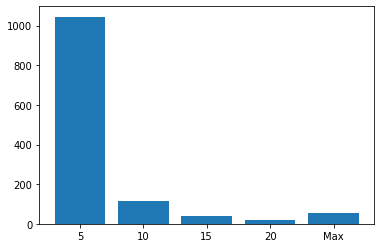

In [11]:
plt.bar(["5","10","15","20","Max"],Dis)

In [12]:
import random
vis_data = []
for i in Dis_data:
    vis_data.append(random.sample(i,10))

In [13]:
Sample_pair = []
for i in vis_data:
    for k in i:
        Sample_pair.append(test_have_duplicate.iloc[k[1]])

In [14]:
def df2list(key):
    return [key["Component"].tolist(),key["Title"].tolist(),key["Description"].tolist()]
def get_key_and_rec(A):
    key = A[1]
    value = A[0]
    key = ALL_bug_Data[["Component","Title","Description"]][ALL_bug_Data["Issue_id"].isin([key])]
    value = ALL_bug_Data[["Component","Title","Description"]][ALL_bug_Data["Issue_id"].isin(value)]
    key = df2list(key)
    value = df2list(value)

In [15]:
Sa = [i.tolist() for i in Sample_pair]

In [16]:
S = []
for i in Sa:
    S.append([i[0].split(";"),i[1]])
for i in range(len(S)):
    S[i][0] = [int(i) for i in S[i][0]] 

In [17]:
def Count_Comp(context):
    Count_Component = {}
    for i in range(context["Component"].shape[0]):
        if context["Component"][i] in Count_Component:
            Count_Component[context["Component"][i]] = Count_Component[context["Component"][i]]+1
        else:
            Count_Component[context["Component"][i]] = 1
    return Count_Component

In [18]:
ALL_bug_Data = pd.read_csv("/home/fhz/Desktop/my/Web visual/BUG DATA/MozillaCore/mozilla_core.csv")
Count_dic = Count_Comp(ALL_bug_Data)

In [26]:
def Make_dic_Comp2id(context):
    ID_Component = {}
    for i in range(context.shape[0]):
        ID_Component[context["Issue_id"][i]] = context["Component"][i]
    Keys = []
    for k in ID_Component.values():
        if k not in Keys:
            Keys.append(k)
    Values = [[] for i in Keys]
    for i in range(context.shape[0]):
        for k in range(len(Keys)):
            if context["Component"][i] == Keys[k]:
                Values[k].append(context["Issue_id"][i])
    return ID_Component,Keys,Values

In [27]:
def do_drop(before,P):
    drop = []
    for i in range(len(before)):
        if random.random()<P:
            drop.append(before[i])
    return drop

In [28]:
S_drop = [[do_drop(s[0],0.72),s[1]] for s in S]

In [29]:
ID_Com,C_k,C_value = Make_dic_Comp2id(ALL_bug_Data)

In [44]:
def get_from_same_ca(k,ID,ca,C_k,C_value,N):
    get = []
    for i in range(len(C_k)):
        if ca == C_k[i]:
            while k < N+1:
                rand_get = C_value[i][random.randint(0,len(C_value[i]))]
                if rand_get != ID:
                    get.append(rand_get)
                    k=k+1
    return get

In [38]:
def do_padding_cut(S_drop,N,C_k,C_value):
    S_padding = []
    for i in range(len(S_drop)):
        temp = []
        ca = ALL_bug_Data["Component"][ALL_bug_Data["Issue_id"]==S_drop[i][1]].tolist()[0] 
        if len(S_drop[i]) <= (N+1):
            temp = get_from_same_ca(len(S_drop[i][0]),S_drop[i][1],ca,C_k,C_value,N)
            S_padding.append([temp,S_drop[i][1]])
        else:
            S_padding.append([random.sample(N,S_drop[i][0]),S_drop[i][0]])
    return S_padding

In [45]:
S_pad = do_padding_cut(S_drop,20,C_k,C_value)

In [98]:
import numpy as np
import pandas as pd
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color
def make_node(issue_id,shape,component,text,size):
    node = {}
    node["label"] = component
    node["color"] = randomcolor()
    node["id"] = issue_id
    node["shape"] = shape
    node["value"] = text
    node["size"] = size
    return node
def get_inf(ID):
    return ALL_bug_Data[["Component","Title"]][ALL_bug_Data["Issue_id"]==ID].values.tolist()[0]
def make_graph(S_drop,S_pad):
    for i in range(len(S_drop)):
        Right = S_drop[i][0]
        Wrong = S_pad[i][0]
        Center = S_drop[i][1]
        nodes = []
        Comp,Title = get_inf(Center)
        for r in Right:
            Comp,Title = get_inf(r)
            nodes.append(make_node(r,"circle",Comp,Title,random.randint(20,35)))
        for w in Wrong:
            Comp,Title = get_inf(w)
            nodes.append(make_node(w,"triangle",Comp,Title,random.randint(15,25)))
        edges = []
        for k in nodes:
            edges.append({"From":Center,"To":k["id"]})
        nodes.append(make_node(Center,"diamond",Comp,Title,50)) 
        G = pd.DataFrame(nodes)
        E = pd.DataFrame(edges)
        G.to_csv("Graph/g"+str(i)+".csv",index=None)
        E.to_csv("Graph/e"+str(i)+".csv",index=None)
    return

In [104]:
make_graph(S_drop,S_pad)

In [124]:
Data = [[0 for i in range(50)] for i in range(50)]

In [125]:
for i in range(len(S)):
    for j in range(50):
        if i == j:
            Data[i][j] = 100
        else:
            if ID_Com[S[i][1]] == ID_Com[S[j][1]]:
                Data[i][j] = random.randint(40,70)
                Data[j][i] = Data[i][j]
            else:
                Data[i][j] = random.randint(10,40)
                Data[j][i] = Data[i][j]

In [131]:
import random

from example.commons import Collector, Faker
from pyecharts import options as opts
from pyecharts.charts import HeatMap, Page

def heatmap_base() -> HeatMap:
    value = [[i, j, Data[i][j]] for i in range(50) for j in range(50)]
    c = (
        HeatMap()
        .add_xaxis(["ID:"+str(i) for i in range(50)])
        .add_yaxis("Regularized Similarity",["ID:"+str(i) for i in range(50)],value)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="样本相关度可视化"),
            visualmap_opts=opts.VisualMapOpts(),
        )
    )
    return c.render_notebook()
heatmap_base()

In [134]:
print(Data)

[[100, 20, 14, 19, 13, 21, 25, 28, 18, 37, 29, 14, 20, 23, 15, 17, 10, 12, 26, 18, 21, 20, 17, 13, 13, 26, 21, 28, 15, 21, 19, 37, 30, 32, 34, 30, 20, 30, 30, 40, 29, 10, 30, 10, 15, 18, 31, 22, 30, 11], [20, 100, 25, 24, 23, 23, 28, 29, 40, 23, 17, 39, 19, 25, 23, 17, 11, 26, 33, 31, 22, 12, 29, 37, 16, 39, 12, 25, 12, 27, 15, 27, 19, 19, 29, 19, 20, 17, 22, 40, 40, 32, 19, 11, 32, 12, 24, 22, 16, 15], [14, 25, 100, 11, 31, 23, 13, 35, 23, 35, 23, 27, 23, 32, 20, 10, 38, 34, 30, 40, 27, 26, 25, 25, 13, 19, 22, 14, 11, 10, 36, 28, 34, 22, 22, 34, 59, 22, 20, 29, 27, 25, 13, 28, 33, 50, 38, 12, 34, 38], [19, 24, 11, 100, 11, 26, 14, 27, 40, 26, 33, 31, 28, 30, 10, 16, 18, 26, 37, 33, 29, 30, 24, 30, 37, 22, 12, 27, 14, 20, 25, 16, 14, 22, 18, 27, 26, 33, 32, 36, 14, 24, 22, 27, 12, 27, 25, 10, 37, 31], [13, 23, 31, 11, 100, 12, 28, 29, 10, 20, 17, 18, 36, 57, 13, 40, 22, 31, 32, 26, 31, 23, 40, 37, 24, 30, 45, 45, 32, 33, 35, 39, 70, 53, 28, 29, 38, 14, 15, 36, 39, 24, 38, 19, 29, 20, 1